In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [2]:
def pre_format_convert_columns(df):
    farmer_group= df.groupby(['Year','owner-id'])['implements-WSA']
    # year 1 or bigger
    for year in df['Year'].unique()[1:]:
        for farmer in df['owner-id'].unique():
            group = farmer_group.get_group((year, farmer))
            group_last_year = farmer_group.get_group((year-1, farmer))
            if (group.item() == 1.0) & (group_last_year.item() == 0.0):
                df.loc[group.index.item(), 'convert-to-WSA'] = 1
                df.loc[group.index.item(), 'converted-in-year'] = year
    return df

In [3]:
def format_convert_columns(df):
    dff = pd.DataFrame(columns = df.columns)
    for run in df['UniqueID'].unique():
        sub_df = df[df['UniqueID'] == run]
        sub_df = pre_format_convert_columns(sub_df)
        dff = pd.concat([dff, sub_df])
    return dff

In [4]:
def format_df(csv_path):
    df = pd.read_csv(csv_path)
    df['convert-to-WSA'] = 0
    df['converted-in-year'] = np.nan   # first year of wsa 
    df['knows-but-does-not-implement'] = 0
    df = df.drop(df[df['implements-WSA'] == 'implements-WSA'].index)
    
    df = df.astype({'owner-id':'float64', 'Year':'int64', 'xcor':'float64',
                'ycor':'float64', 'implements-WSA':'float64', 'owner-knows-WSA':'float64',
                 'yield':'float64', 'TotalYearRainfall':'float64', 'who':'int64',
                  'LeadFarmers':'int64'})
    df = format_convert_columns(df)
    ## make column knows-but-does-not-implement 1 for rows that need it
    df.loc[(df['implements-WSA'] == 0) & (df['owner-knows-WSA'] == 1), 
           'knows-but-does-not-implement'] = 1
    df['average-yield-per-field'] = df['yield'] / df['who']
    df = df.astype({'average-yield-per-field':'float64'})
    return df

In [6]:
df_5_no_c = format_df('modelOutputParamCombo0')
df_5_no_w = format_df('modelOutputParamCombo9')
df_5_no_w

C:\Users\User\AppData\Local\Temp\ipykernel_12436\1089986846.py:6: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  dff = pd.concat([dff, sub_df])
C:\Users\User\AppData\Local\Temp\ipykernel_12436\1089986846.py:6: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  dff = pd.concat([dff, sub_df])


,owner-id,Year,xcor,ycor,implements-WSA,owner-knows-WSA,yield,TotalYearRainfall,who,LeadFarmers,SocialScenario,ClimateScenario,UniqueID,convert-to-WSA,converted-in-year,knows-but-does-not-implement,average-yield-per-field
0,0.0,0,-24.5,22.50,0.0,0.0,200.000000,0.000000,4,5,No Desperation,Warm Climate,2023-11-28 19:53:28.375456,0,NaN,0,50.000000
1,0.0,1,-24.5,22.50,0.0,0.0,232.529866,434.277079,4,5,No Desperation,Warm Climate,2023-11-28 19:53:28.375456,0,NaN,0,58.132467
2,0.0,2,-24.5,22.50,0.0,0.0,221.982791,790.809540,4,5,No Desperation,Warm Climate,2023-11-28 19:53:28.375456,0,NaN,0,55.495698
3,0.0,3,-24.5,22.50,0.0,0.0,225.806924,881.814459,4,5,No Desperation,Warm Climate,2023-11-28 19:53:28.375456,0,NaN,0,56.451731
4,0.0,4,-24.5,22.50,0.0,0.0,228.363800,1020.357248,4,5,No Desperation,Warm Climate,2023-11-28 19:53:28.375456,0,NaN,0,57.090950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248004,799.0,26,19.0,-16.25,1.0,1.0,241.879130,1469.055054,4,5,No Desperation,Warm Climate,2023-11-28 19:54:15.288471,0,NaN,0,60.469782
248005,799.0,27,19.0,-16.25,1.0,1.0,242.355640,1631.687391,4,5,No Desperation,Warm Climate,2023-11-28 19:54:15.288471,0,NaN,0,60.588910
248006,799.0,28,19.0,-16.25,1.0,1.0,247.686274,1428.967197,4,5,No Desperation,Warm Climate,2023-11-28 19:54:15.288471,0,NaN,0,61.921568
248007,799.0,29,19.0,-16.25,1.0,1.0,235.229544,1557.718957,4,5,No Desperation,Warm Climate,2023-11-28 19:54:15.288471,0,NaN,0,58.807386


In [7]:
df_5_hj_c = format_df('modelOutputParamCombo1')
df_5_hj_w = format_df('modelOutputParamCombo10')
df_5_lj_c = format_df('modelOutputParamCombo2')
df_5_lj_w = format_df('modelOutputParamCombo11')

C:\Users\User\AppData\Local\Temp\ipykernel_12436\1089986846.py:6: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  dff = pd.concat([dff, sub_df])
C:\Users\User\AppData\Local\Temp\ipykernel_12436\1089986846.py:6: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  dff = pd.concat([dff, sub_df])
C:\Users\User\AppData\Local\Temp\ipykernel_12436\1089986846.py:6: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude 

In [8]:
df_10_no_c = format_df('modelOutputParamCombo3')
df_10_no_w = format_df('modelOutputParamCombo12')

df_10_hj_c = format_df('modelOutputParamCombo4')
df_10_hj_w = format_df('modelOutputParamCombo13')

df_10_lj_c = format_df('modelOutputParamCombo5')
df_10_lj_w = format_df('modelOutputParamCombo14')

C:\Users\User\AppData\Local\Temp\ipykernel_12436\1089986846.py:6: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  dff = pd.concat([dff, sub_df])
C:\Users\User\AppData\Local\Temp\ipykernel_12436\1089986846.py:6: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  dff = pd.concat([dff, sub_df])
C:\Users\User\AppData\Local\Temp\ipykernel_12436\1089986846.py:6: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude 

In [9]:
df_20_no_c = format_df('modelOutputParamCombo6')
df_20_no_w = format_df('modelOutputParamCombo15')

df_20_hj_c = format_df('modelOutputParamCombo7')
df_20_hj_w = format_df('modelOutputParamCombo16')

df_20_lj_c = format_df('modelOutputParamCombo8')
df_20_lj_w = format_df('modelOutputParamCombo17')

C:\Users\User\AppData\Local\Temp\ipykernel_12436\1089986846.py:6: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  dff = pd.concat([dff, sub_df])
C:\Users\User\AppData\Local\Temp\ipykernel_12436\1089986846.py:6: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  dff = pd.concat([dff, sub_df])
C:\Users\User\AppData\Local\Temp\ipykernel_12436\1089986846.py:6: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude 

In [10]:
df_10_hj_c

,owner-id,Year,xcor,ycor,implements-WSA,owner-knows-WSA,yield,TotalYearRainfall,who,LeadFarmers,SocialScenario,ClimateScenario,UniqueID,convert-to-WSA,converted-in-year,knows-but-does-not-implement,average-yield-per-field
0,0.0,0,13.0,-15.5,0.0,0.0,100.000000,0.000000,2,10,High Jealousy Tolerance,Current Climate,2023-11-28 19:16:50.182033,0,NaN,0,50.000000
1,0.0,1,13.0,-15.5,0.0,0.0,96.475014,562.632809,2,10,High Jealousy Tolerance,Current Climate,2023-11-28 19:16:50.182033,0,NaN,0,48.237507
2,0.0,2,13.0,-15.5,0.0,0.0,87.796407,864.589798,2,10,High Jealousy Tolerance,Current Climate,2023-11-28 19:16:50.182033,0,NaN,0,43.898204
3,0.0,3,13.0,-15.5,0.0,0.0,83.897271,1040.690023,2,10,High Jealousy Tolerance,Current Climate,2023-11-28 19:16:50.182033,0,NaN,0,41.948636
4,0.0,4,13.0,-15.5,0.0,0.0,89.723942,963.059953,2,10,High Jealousy Tolerance,Current Climate,2023-11-28 19:16:50.182033,0,NaN,0,44.861971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248004,799.0,26,-7.0,20.0,1.0,1.0,61.124760,1266.171883,1,10,High Jealousy Tolerance,Current Climate,2023-11-28 19:17:16.689598,0,NaN,0,61.124760
248005,799.0,27,-7.0,20.0,1.0,1.0,59.780394,1277.112571,1,10,High Jealousy Tolerance,Current Climate,2023-11-28 19:17:16.689598,0,NaN,0,59.780394
248006,799.0,28,-7.0,20.0,1.0,1.0,63.380955,1317.856674,1,10,High Jealousy Tolerance,Current Climate,2023-11-28 19:17:16.689598,0,NaN,0,63.380955
248007,799.0,29,-7.0,20.0,1.0,1.0,60.794375,1456.247183,1,10,High Jealousy Tolerance,Current Climate,2023-11-28 19:17:16.689598,0,NaN,0,60.794375


In [11]:
df_5_no_w.dtypes

owner-id                        float64
Year                             object
xcor                            float64
ycor                            float64
implements-WSA                  float64
owner-knows-WSA                 float64
yield                           float64
TotalYearRainfall               float64
who                              object
LeadFarmers                      object
SocialScenario                   object
ClimateScenario                  object
UniqueID                         object
convert-to-WSA                   object
converted-in-year               float64
knows-but-does-not-implement     object
average-yield-per-field         float64
dtype: object

In [12]:
df_5_no_w.nunique()

owner-id                           800
Year                                31
xcor                               747
ycor                               731
implements-WSA                       2
owner-knows-WSA                      2
yield                           222935
TotalYearRainfall                   31
who                                 11
LeadFarmers                          1
SocialScenario                       1
ClimateScenario                      1
UniqueID                            10
convert-to-WSA                       2
converted-in-year                   19
knows-but-does-not-implement         2
average-yield-per-field         222925
dtype: int64

In [13]:
# wsa_group_c = df_5_no_c.groupby(['Year', 'implements-WSA'])['yield'].mean()
# wsa_group_w = df_5_no_w.groupby(['Year', 'implements-WSA'])['yield'].mean()
# wsa_group_c

In [14]:
#len(wsa_group_c)

In [15]:
# wsa_yr_group_c = wsa_group_c.groupby('implements-WSA')
# wsa_yr_group_w = wsa_group_w.groupby('implements-WSA')
# wsa_yr_group_c

In [16]:
# for implementsWSA, yld in wsa_yr_group_c:
#     print(implementsWSA, yld)

In [17]:
#wsa_yr_group_w.get_group(0.0)

In [18]:
def get_wsa_groups(df):
    wsa_group = df.groupby(['Year', 'implements-WSA'])["average-yield-per-field"].mean()
    wsa_yr_group = wsa_group.groupby('implements-WSA')
    return wsa_yr_group


In [107]:
def plot_avg_yield(df_current, df_warm):
    wsa_yr_group_c = get_wsa_groups(df_current)
    wsa_yr_group_w = get_wsa_groups(df_warm)
    
    fig = plt.figure(figsize=(8,4))
    ax = fig.add_subplot(111)

    #ax.set(title="Average yield per year", xlabel="Year", ylabel="Average yield")
    ax.plot(wsa_yr_group_c.get_group(0.0).tolist(), label = "Traditional, Current Climate", color='C0')
    ax.plot(wsa_yr_group_c.get_group(1.0).tolist(), label = "WSA, Current Climate", color='C0', linestyle = 'dashed')
    ax.plot(wsa_yr_group_w.get_group(0.0).tolist(), label = "Traditional, Warm Climate", color='C1')
    ax.plot(wsa_yr_group_w.get_group(1.0).tolist(), label = "WSA, Warm Climate", color='C1', linestyle = 'dashed')
    #ax.set_title("Average yield per year", fontsize=11)
    ax.set_xlabel("Year", fontsize=10)
    ax.set_ylabel("Average yield", fontsize=10)
    ax.legend(loc='best', ncol=2, fontsize=8)

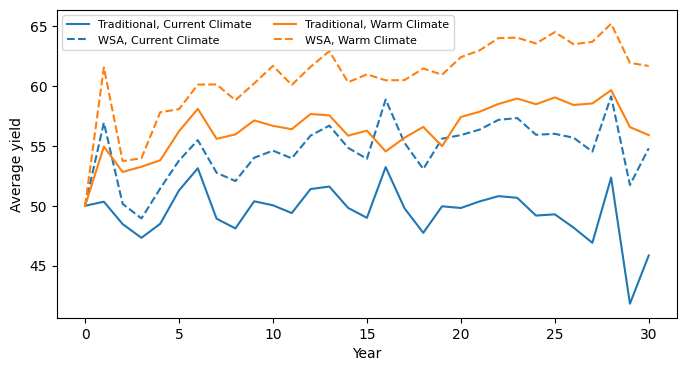

In [108]:
plot_avg_yield(df_10_hj_c, df_10_hj_w)

In [21]:
# farmer_group_5_no_c = df_5_no_c.groupby(['Year','owner-id'])['implements-WSA']
# farmer_group_5_no_w = df_5_no_w.groupby(['Year','owner-id'])['implements-WSA']

In [22]:
# farmer_group_5_no_c.groups

In [23]:
# farmer_group_5_no_c.get_group((3, 11.0))

In [24]:
# farmer_group_5_no_c.get_group((1, 0.0))

In [25]:
# farmer_group_5_no_c.get_group((9, 796.0))

In [26]:
# s =farmer_group_5_no_c.get_group((3, 11.0)).reset_index()
# idx = s['index']
# farmer_group_5_no_c.get_group((3, 11.0))[idx[0]]

In [27]:
# for i in idx:
#     print(i)

In [28]:
# df_5_no_c.loc[28606, 'convert-to-WSA'] 

In [29]:
# df_5_no_c['Year'].unique()[1:]

In [30]:
# df = df_5_no_c[df_5_no_c['UniqueID']== '2023-11-28 18:48:06.098940']
# farmer_group= df.groupby(['Year','owner-id'])['implements-WSA']

In [31]:
# s = farmer_group.get_group((6, 700.0)).reset_index()
# for i in s['index']:
#     print(i)

In [32]:
# s['index'][0]

In [33]:
# df[df['UniqueID'] == '2023-11-28 18:48:06.098940'].loc[21706, 'implements-WSA'] 

In [34]:
# if (farmer_group.get_group((6, 700.0))==0.0).item():
#     print('hi')

In [35]:
# farmer_group.get_group((5, 700.0)).item() == 0.0

In [36]:
# farmer_group.get_group((5, 700.0)).index.item()

In [37]:
def get_wsa_uptake_per_year(df):
    wsa_uptake_percentages = []
    for year in df['Year'].unique():
        num_wsa = len(df[(df['Year'] == year) & (df['implements-WSA'] == 1)])
        everyone = len(df[(df['Year'] == year)])
        wsa_uptake_percentage = num_wsa / everyone * 100
        wsa_uptake_percentages.append(wsa_uptake_percentage)
    return wsa_uptake_percentages
    

In [38]:
def get_avg_wsa_uptake_per_year(df):
    runs = df['UniqueID'].unique()
    wsa_uptake_percentages_arrays = []
    for run in runs:
        wsa_uptake_percentages = get_wsa_uptake_per_year(df[df['UniqueID'] == run])
        wsa_uptake_percentages_arrays.append(wsa_uptake_percentages)
    avg = np.average(wsa_uptake_percentages_arrays, axis=0)
    return avg

In [96]:
def plot_wsa_uptake_soc(df_no, df_hj, df_lj):
    wsa_uptake_percentages_no = get_avg_wsa_uptake_per_year(df_no)
    wsa_uptake_percentages_hj = get_avg_wsa_uptake_per_year(df_hj)
    wsa_uptake_percentages_lj = get_avg_wsa_uptake_per_year(df_lj)

    fig = plt.figure(figsize=(8,4))
    ax = fig.add_subplot(111)

  
    ax.plot(wsa_uptake_percentages_no, label = "No Desperation")
    ax.plot(wsa_uptake_percentages_hj, label = "High Jealousy Tolerance")
    ax.plot(wsa_uptake_percentages_lj, label = "Low Jealousy Tolerance")

    #ax.set_title("Average WSA Usage Percentage per Year", fontsize=13)
    ax.set_xlabel("Year", fontsize=12)
    ax.set_ylabel("Average WSA Usage %", fontsize=12)
    ax.legend(loc='best')

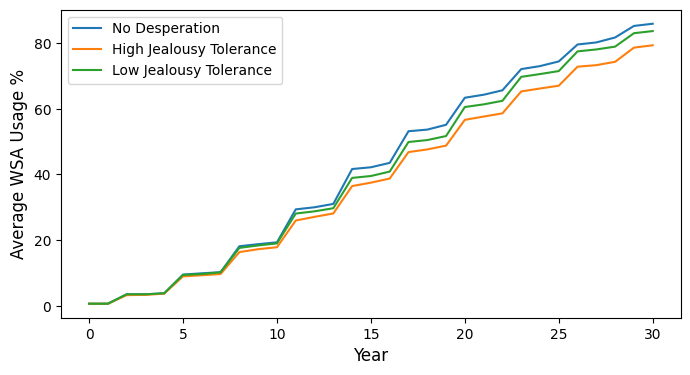

In [97]:
plot_wsa_uptake_soc(df_5_no_c, df_5_hj_c, df_5_lj_c)

In [98]:
def plot_wsa_uptake_cli(df_current, df_warm):
    wsa_uptake_percentages_c = get_avg_wsa_uptake_per_year(df_current)
    wsa_uptake_percentages_w = get_avg_wsa_uptake_per_year(df_warm)
  
    fig = plt.figure(figsize=(8,4))
    ax = fig.add_subplot(111)

  
    ax.plot(wsa_uptake_percentages_c, label = "Current Climate")
    ax.plot(wsa_uptake_percentages_w, label = "Warm Climate")
    
    #ax.set_title("Average WSA Usage Percentage per Year", fontsize=13)
    ax.set_xlabel("Year", fontsize=12)
    ax.set_ylabel("Average WSA Usage %", fontsize=12)
    ax.legend(loc='best')

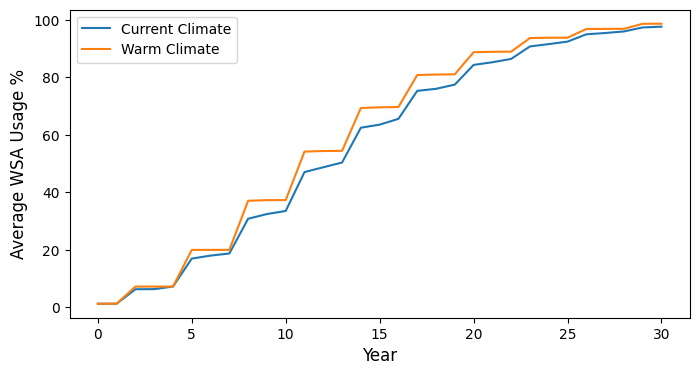

In [99]:
plot_wsa_uptake_cli(df_10_lj_c, df_10_lj_w)

In [41]:
def get_convert_rate_per_year(df):
    convert_rates = []
    for year in df['Year'].unique()[1:]:
        conversions = len(df[(df['converted-in-year'] == year) & (df['convert-to-WSA'] == 1)])
        possible_conversions = len(df[(df['Year'] == year-1) & (df['knows-but-does-not-implement'] == 1)])
        if possible_conversions != 0:
            convert_rate = conversions / possible_conversions
        else:
            convert_rate = 0
        convert_rates.append(convert_rate)
    return convert_rates

In [42]:
def get_avg_convert_rate_per_year(df):
    runs = df['UniqueID'].unique()
    convert_rates_arrays = []
    for run in runs:
        convert_rates = get_convert_rate_per_year(df[df['UniqueID'] == run])
        convert_rates_arrays.append(convert_rates)
    avg = np.average(convert_rates_arrays, axis=0)
    return avg

In [101]:
def plot_conversion_rates(df_current, df_warm):
    convert_rates_c = get_avg_convert_rate_per_year(df_current)
    convert_rates_w = get_avg_convert_rate_per_year(df_warm)

    fig = plt.figure(figsize=(8,4))
    ax = fig.add_subplot(111)

    #ax.set(title="Average yield per year", xlabel="Year", ylabel="Average yield")
    ax.plot(convert_rates_c[1:], label = "Current Climate")
    ax.plot(convert_rates_w[1:], label = "Warm Climate")

    #ax.set_title("Average Conversion Rate from Traditional Practice to WSA per Year", fontsize=13)
    ax.set_xlabel("Year", fontsize=12)
    ax.set_ylabel("Average Conversion Rate", fontsize=12)
    ax.legend(loc='best')

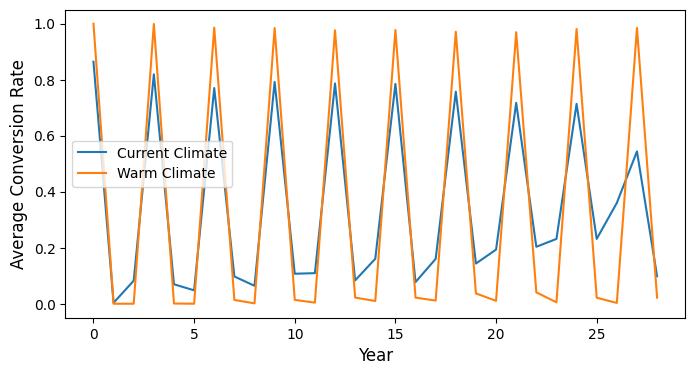

In [102]:
plot_conversion_rates(df_10_lj_c, df_10_lj_w)

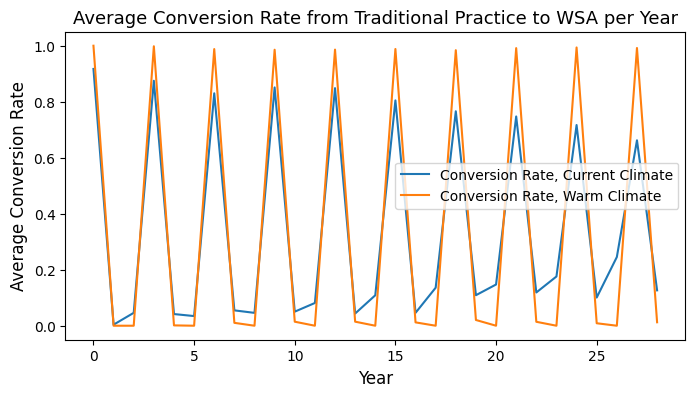

In [44]:
plot_conversion_rates(df_5_no_c, df_5_no_w)

In [45]:
df_5_no_w[(df_5_no_w['UniqueID'] == '2023-11-28 19:53:28.375456') & (df_5_no_w['Year'] == 1)]['TotalYearRainfall']

1        434.277079
32       434.277079
63       434.277079
94       434.277079
125      434.277079
            ...    
24646    434.277079
24677    434.277079
24708    434.277079
24739    434.277079
24770    434.277079
Name: TotalYearRainfall, Length: 800, dtype: float64

In [ ]:
def get_avg_rainfall(df):
    runs = df['UniqueID'].unique()
    rainfall_arrays = []
    for run in runs:
        df = df[df['UniqueID'] == run]
        for year in df['Year'].unique():
            rainfall = np.average(df[df['Year' == year]]['TotalYearRainfall'], axis=0)
            rainfall_arrays.append(rainfall)
    avg = np.average(rainfall_arrays, axis=0)
    return avg
    #return rainfall_arrays

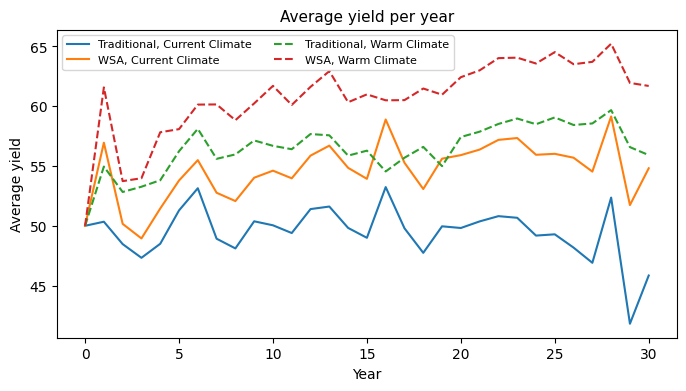

In [104]:
plot_avg_yield(df_10_hj_c, df_10_hj_w)

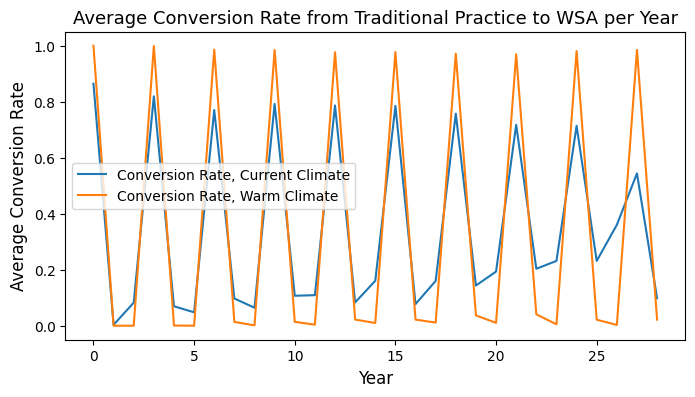

In [100]:
plot_conversion_rates(df_10_lj_c, df_10_lj_w)

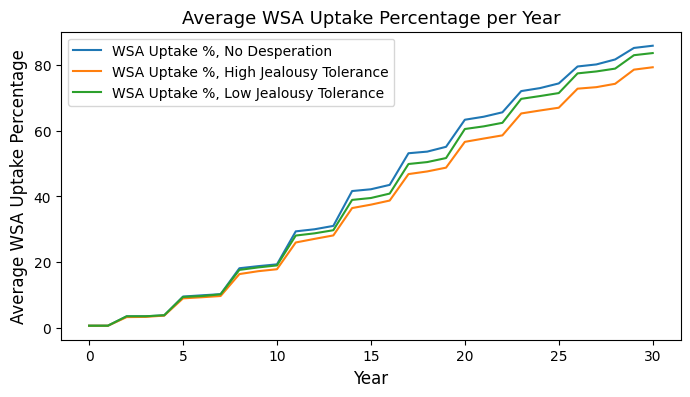

In [49]:
plot_wsa_uptake_soc(df_5_no_c, df_5_hj_c, df_5_lj_c)

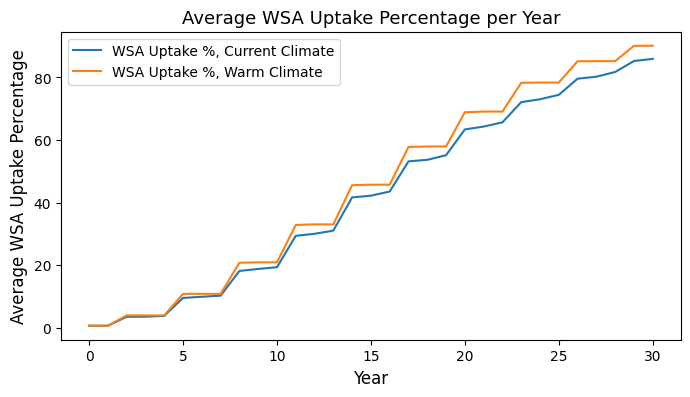

In [50]:
plot_wsa_uptake_cli(df_5_no_c, df_5_no_w)

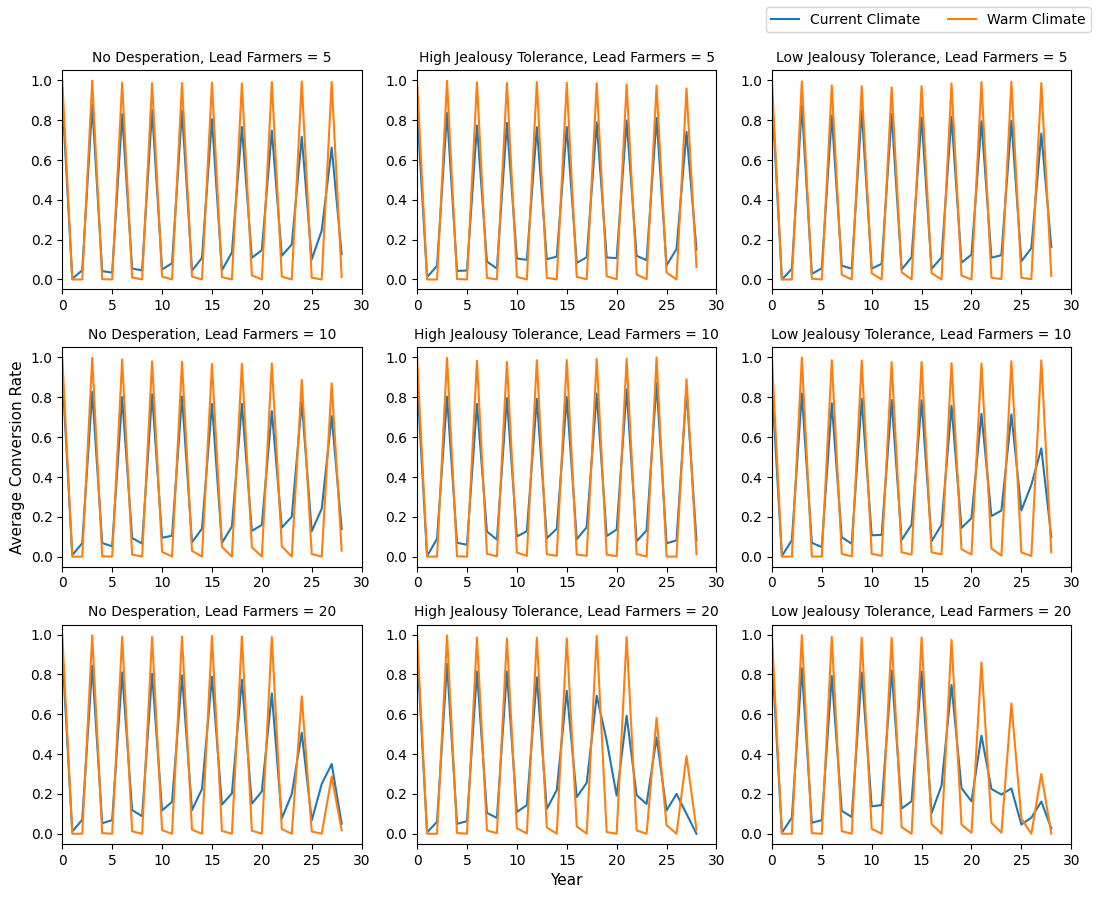

In [83]:
fig, axs = plt.subplots(3, 3, figsize=(11, 9))
#fig.suptitle('Average Conversion Rate from Traditional Practice to WSA per Year')
fig.suptitle('  ')
axs[0, 0].plot(get_avg_convert_rate_per_year(df_5_no_c)[1:], label = "Current Climate")
axs[0, 0].plot(get_avg_convert_rate_per_year(df_5_no_w)[1:], label = "Warm Climate")
axs[0, 0].set_title("No Desperation, Lead Farmers = 5", fontsize=10)
axs[0, 1].plot(get_avg_convert_rate_per_year(df_5_hj_c)[1:])
axs[0, 1].plot(get_avg_convert_rate_per_year(df_5_hj_w)[1:])
axs[0, 1].set_title("High Jealousy Tolerance, Lead Farmers = 5", fontsize=10)
axs[0, 2].plot(get_avg_convert_rate_per_year(df_5_lj_c)[1:])
axs[0, 2].plot(get_avg_convert_rate_per_year(df_5_lj_w)[1:])
axs[0, 2].set_title("Low Jealousy Tolerance, Lead Farmers = 5", fontsize=10)
axs[1, 0].plot(get_avg_convert_rate_per_year(df_10_no_c)[1:])
axs[1, 0].plot(get_avg_convert_rate_per_year(df_10_no_w)[1:])
axs[1, 0].set_title("No Desperation, Lead Farmers = 10", fontsize=10)
axs[1, 1].plot(get_avg_convert_rate_per_year(df_10_hj_c)[1:])
axs[1, 1].plot(get_avg_convert_rate_per_year(df_10_hj_w)[1:])
axs[1, 1].set_title("High Jealousy Tolerance, Lead Farmers = 10", fontsize=10)
axs[1, 2].plot(get_avg_convert_rate_per_year(df_10_lj_c)[1:])
axs[1, 2].plot(get_avg_convert_rate_per_year(df_10_lj_w)[1:])
axs[1, 2].set_title("Low Jealousy Tolerance, Lead Farmers = 10", fontsize=10)
axs[2, 0].plot(get_avg_convert_rate_per_year(df_20_no_c)[1:])
axs[2, 0].plot(get_avg_convert_rate_per_year(df_20_no_w)[1:])
axs[2, 0].set_title("No Desperation, Lead Farmers = 20", fontsize=10)
axs[2, 1].plot(get_avg_convert_rate_per_year(df_20_hj_c)[1:])
axs[2, 1].plot(get_avg_convert_rate_per_year(df_20_hj_w)[1:])
axs[2, 1].set_title("High Jealousy Tolerance, Lead Farmers = 20", fontsize=10)
axs[2, 2].plot(get_avg_convert_rate_per_year(df_20_lj_c)[1:])
axs[2, 2].plot(get_avg_convert_rate_per_year(df_20_lj_w)[1:])
axs[2, 2].set_title("Low Jealousy Tolerance, Lead Farmers = 20", fontsize=10)
for i in range(3):
    for ii in range(3):
        #axs[i, ii].set_xlabel('Year', fontsize=11)
        #axs[i, ii].set_ylabel('Average Conversion Rate', fontsize=11)
        axs[i, ii].set_xlim([0, 30])
axs[2, 1].set_xlabel('Year', fontsize=11)
axs[1, 0].set_ylabel('Average Conversion Rate', fontsize=11)
fig.legend(ncol=2, fontsize=10)
fig.tight_layout()

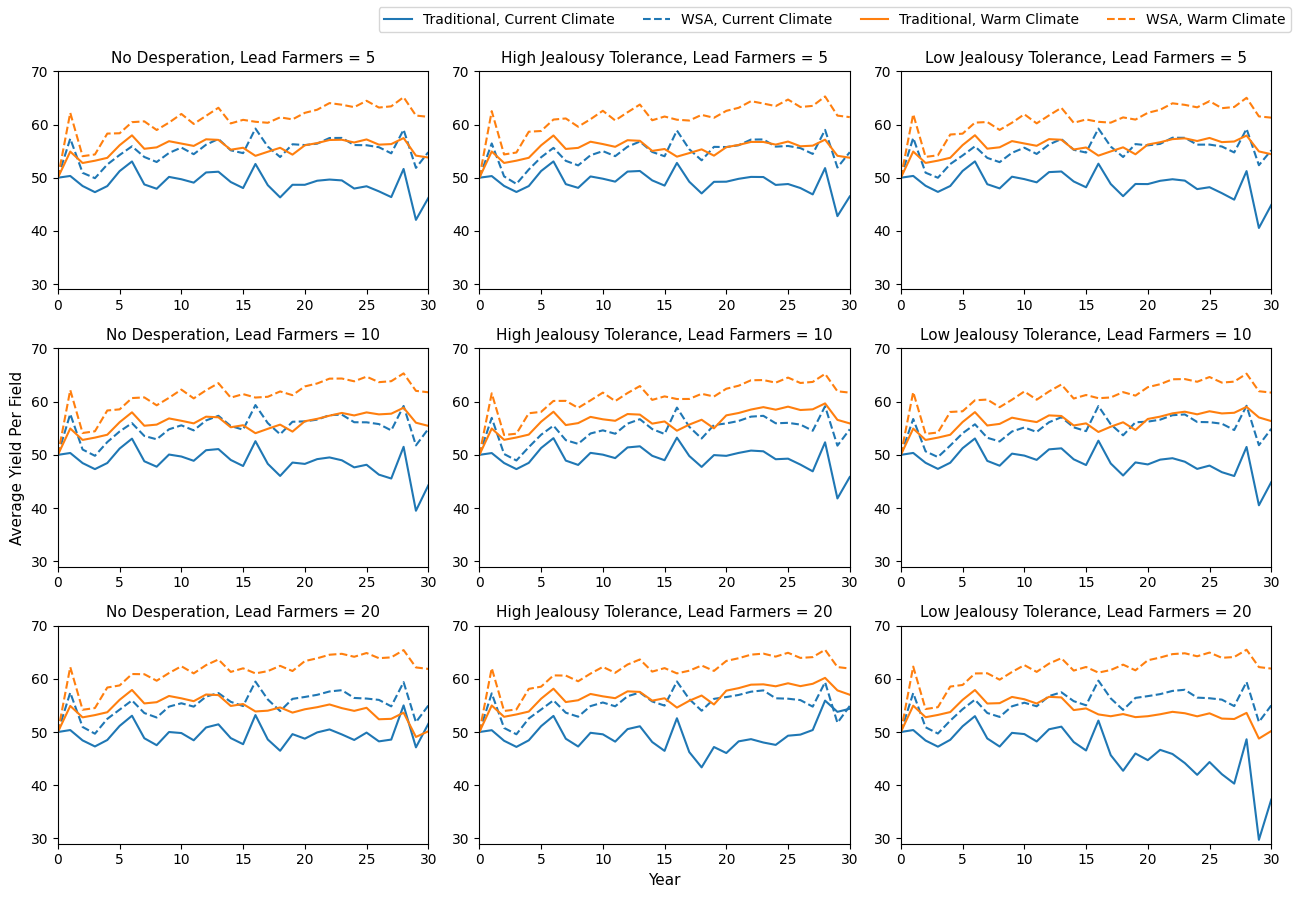

In [92]:
fig, axs = plt.subplots(3, 3, figsize=(13, 9))
#fig.suptitle("Average yield per year", x=0.1)
fig.suptitle("  ")
axs[0, 0].plot(get_wsa_groups(df_5_no_c).get_group(0.0).tolist(), label = "Traditional, Current Climate", color='C0')
axs[0, 0].plot(get_wsa_groups(df_5_no_c).get_group(1.0).tolist(), label = "WSA, Current Climate", color='C0', linestyle = 'dashed')
axs[0, 0].plot(get_wsa_groups(df_5_no_w).get_group(0.0).tolist(), label = "Traditional, Warm Climate", color='C1')
axs[0, 0].plot(get_wsa_groups(df_5_no_w).get_group(1.0).tolist(), label = "WSA, Warm Climate", color='C1', linestyle = 'dashed')
axs[0, 0].set_title("No Desperation, Lead Farmers = 5", fontsize=11)
axs[0, 1].plot(get_wsa_groups(df_5_hj_c).get_group(0.0).tolist(), color='C0')
axs[0, 1].plot(get_wsa_groups(df_5_hj_c).get_group(1.0).tolist(), color='C0', linestyle = 'dashed')
axs[0, 1].plot(get_wsa_groups(df_5_hj_w).get_group(0.0).tolist(), color='C1')
axs[0, 1].plot(get_wsa_groups(df_5_hj_w).get_group(1.0).tolist(), color='C1', linestyle = 'dashed')
axs[0, 1].set_title("High Jealousy Tolerance, Lead Farmers = 5", fontsize=11)
axs[0, 2].plot(get_wsa_groups(df_5_lj_c).get_group(0.0).tolist(), color='C0')
axs[0, 2].plot(get_wsa_groups(df_5_lj_c).get_group(1.0).tolist(), color='C0', linestyle = 'dashed')
axs[0, 2].plot(get_wsa_groups(df_5_lj_w).get_group(0.0).tolist(), color='C1')
axs[0, 2].plot(get_wsa_groups(df_5_lj_w).get_group(1.0).tolist(), color='C1', linestyle = 'dashed')
axs[0, 2].set_title("Low Jealousy Tolerance, Lead Farmers = 5", fontsize=11)
axs[1, 0].plot(get_wsa_groups(df_10_no_c).get_group(0.0).tolist(), color='C0')
axs[1, 0].plot(get_wsa_groups(df_10_no_c).get_group(1.0).tolist(), color='C0', linestyle = 'dashed')
axs[1, 0].plot(get_wsa_groups(df_10_no_w).get_group(0.0).tolist(), color='C1')
axs[1, 0].plot(get_wsa_groups(df_10_no_w).get_group(1.0).tolist(), color='C1', linestyle = 'dashed')
axs[1, 0].set_title("No Desperation, Lead Farmers = 10", fontsize=11)
axs[1, 1].plot(get_wsa_groups(df_10_hj_c).get_group(0.0).tolist(), color='C0')
axs[1, 1].plot(get_wsa_groups(df_10_hj_c).get_group(1.0).tolist(), color='C0', linestyle = 'dashed')
axs[1, 1].plot(get_wsa_groups(df_10_hj_w).get_group(0.0).tolist(), color='C1')
axs[1, 1].plot(get_wsa_groups(df_10_hj_w).get_group(1.0).tolist(), color='C1', linestyle = 'dashed')
axs[1, 1].set_title("High Jealousy Tolerance, Lead Farmers = 10", fontsize=11)
axs[1, 2].plot(get_wsa_groups(df_10_lj_c).get_group(0.0).tolist(), color='C0')
axs[1, 2].plot(get_wsa_groups(df_10_lj_c).get_group(1.0).tolist(), color='C0', linestyle = 'dashed')
axs[1, 2].plot(get_wsa_groups(df_10_lj_w).get_group(0.0).tolist(), color='C1')
axs[1, 2].plot(get_wsa_groups(df_10_lj_w).get_group(1.0).tolist(), color='C1', linestyle = 'dashed')
axs[1, 2].set_title("Low Jealousy Tolerance, Lead Farmers = 10", fontsize=11)
axs[2, 0].plot(get_wsa_groups(df_20_no_c).get_group(0.0).tolist(), color='C0')
axs[2, 0].plot(get_wsa_groups(df_20_no_c).get_group(1.0).tolist(), color='C0', linestyle = 'dashed')
axs[2, 0].plot(get_wsa_groups(df_20_no_w).get_group(0.0).tolist(), color='C1')
axs[2, 0].plot(get_wsa_groups(df_20_no_w).get_group(1.0).tolist(), color='C1', linestyle = 'dashed')
axs[2, 0].set_title("No Desperation, Lead Farmers = 20", fontsize=11)
axs[2, 1].plot(get_wsa_groups(df_20_hj_c).get_group(0.0).tolist(), color='C0')
axs[2, 1].plot(get_wsa_groups(df_20_hj_c).get_group(1.0).tolist(), color='C0', linestyle = 'dashed')
axs[2, 1].plot(get_wsa_groups(df_20_hj_w).get_group(0.0).tolist(), color='C1')
axs[2, 1].plot(get_wsa_groups(df_20_hj_w).get_group(1.0).tolist(), color='C1', linestyle = 'dashed')
axs[2, 1].set_title("High Jealousy Tolerance, Lead Farmers = 20", fontsize=11)
axs[2, 2].plot(get_wsa_groups(df_20_lj_c).get_group(0.0).tolist(), color='C0')
axs[2, 2].plot(get_wsa_groups(df_20_lj_c).get_group(1.0).tolist(), color='C0', linestyle = 'dashed')
axs[2, 2].plot(get_wsa_groups(df_20_lj_w).get_group(0.0).tolist(), color='C1')
axs[2, 2].plot(get_wsa_groups(df_20_lj_w).get_group(1.0).tolist(), color='C1', linestyle = 'dashed')
axs[2, 2].set_title("Low Jealousy Tolerance, Lead Farmers = 20", fontsize=11)
for i in range(3):
    for ii in range(3):
        #axs[i, ii].set_xlabel('Year')
        #axs[i, ii].set_ylabel('Average Yield')
        axs[i, ii].set_xlim([0, 30])
        axs[i, ii].set_ylim([29, 70])
axs[2, 1].set_xlabel('Year', fontsize=11)
axs[1, 0].set_ylabel('Average Yield Per Field', fontsize=11)
fig.legend(ncol=4, fontsize=10)
fig.tight_layout()
# plt.show()

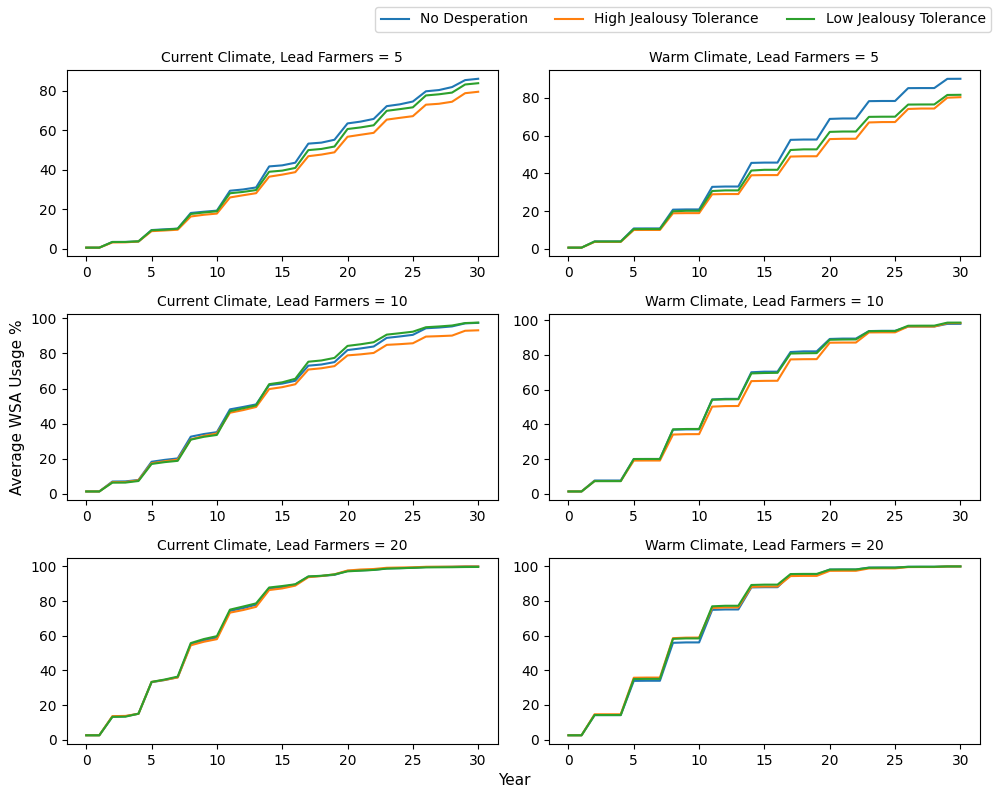

In [110]:
fig, axs = plt.subplots(3, 2, figsize=(10, 8))
#fig.suptitle("Average WSA Uptake Percentage per Year", x=0.1)
fig.suptitle("  ")
axs[0, 0].plot(get_avg_wsa_uptake_per_year(df_5_no_c), label = "No Desperation")
axs[0, 0].plot(get_avg_wsa_uptake_per_year(df_5_hj_c), label = "High Jealousy Tolerance")
axs[0, 0].plot(get_avg_wsa_uptake_per_year(df_5_lj_c), label = "Low Jealousy Tolerance")
axs[0, 0].set_title("Current Climate, Lead Farmers = 5", fontsize=10)
axs[0, 1].plot(get_avg_wsa_uptake_per_year(df_5_no_w))
axs[0, 1].plot(get_avg_wsa_uptake_per_year(df_5_hj_w))
axs[0, 1].plot(get_avg_wsa_uptake_per_year(df_5_lj_w))
axs[0, 1].set_title("Warm Climate, Lead Farmers = 5", fontsize=10)
axs[1, 0].plot(get_avg_wsa_uptake_per_year(df_10_no_c))
axs[1, 0].plot(get_avg_wsa_uptake_per_year(df_10_hj_c))
axs[1, 0].plot(get_avg_wsa_uptake_per_year(df_10_lj_c))
axs[1, 0].set_title("Current Climate, Lead Farmers = 10", fontsize=10)
axs[1, 1].plot(get_avg_wsa_uptake_per_year(df_10_no_w))
axs[1, 1].plot(get_avg_wsa_uptake_per_year(df_10_hj_w))
axs[1, 1].plot(get_avg_wsa_uptake_per_year(df_10_lj_w))
axs[1, 1].set_title("Warm Climate, Lead Farmers = 10", fontsize=10)

axs[2, 0].plot(get_avg_wsa_uptake_per_year(df_20_no_c))
axs[2, 0].plot(get_avg_wsa_uptake_per_year(df_20_hj_c))
axs[2, 0].plot(get_avg_wsa_uptake_per_year(df_20_lj_c))
axs[2, 0].set_title("Current Climate, Lead Farmers = 20", fontsize=10)
axs[2, 1].plot(get_avg_wsa_uptake_per_year(df_20_no_w))
axs[2, 1].plot(get_avg_wsa_uptake_per_year(df_20_hj_w))
axs[2, 1].plot(get_avg_wsa_uptake_per_year(df_20_lj_w))
axs[2, 1].set_title("Warm Climate, Lead Farmers = 20", fontsize=10)

#for i in range(3):
#    for ii in range(2):
#        axs[i, ii].set_xlabel('Year')
#        axs[i, ii].set_ylabel('Average WSA Uptake Percentage')
        #axs[i, ii].set_xlim([0, 30])
        #axs[i, ii].set_ylim([0, 120])
axs[2, 1].set_xlabel('Year', x=-0.08, fontsize=11)
axs[1, 0].set_ylabel('Average WSA Usage %', fontsize=11)
fig.legend(ncol=3, fontsize=10)
fig.tight_layout()

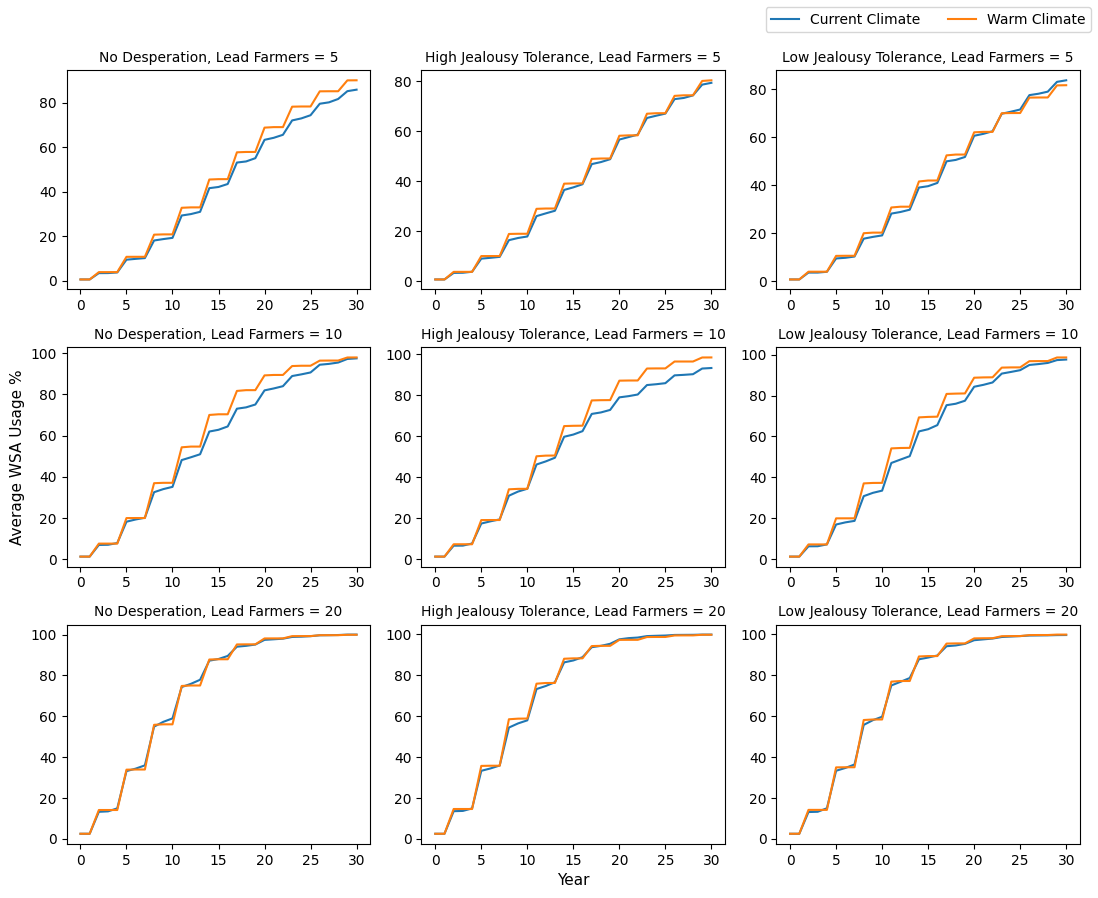

In [111]:
fig, axs = plt.subplots(3, 3, figsize=(11, 9))
#fig.suptitle("Average WSA Uptake Percentage per Year")
fig.suptitle("  ")
axs[0, 0].plot(get_avg_wsa_uptake_per_year(df_5_no_c), label = "Current Climate")
axs[0, 0].plot(get_avg_wsa_uptake_per_year(df_5_no_w), label = "Warm Climate")
axs[0, 0].set_title("No Desperation, Lead Farmers = 5", fontsize=10)

axs[0, 1].plot(get_avg_wsa_uptake_per_year(df_5_hj_c))
axs[0, 1].plot(get_avg_wsa_uptake_per_year(df_5_hj_w))
axs[0, 1].set_title("High Jealousy Tolerance, Lead Farmers = 5", fontsize=10)

axs[0, 2].plot(get_avg_wsa_uptake_per_year(df_5_lj_c))
axs[0, 2].plot(get_avg_wsa_uptake_per_year(df_5_lj_w))
axs[0, 2].set_title("Low Jealousy Tolerance, Lead Farmers = 5", fontsize=10)

axs[1, 0].plot(get_avg_wsa_uptake_per_year(df_10_no_c))
axs[1, 0].plot(get_avg_wsa_uptake_per_year(df_10_no_w))
axs[1, 0].set_title("No Desperation, Lead Farmers = 10", fontsize=10)

axs[1, 1].plot(get_avg_wsa_uptake_per_year(df_10_hj_c))
axs[1, 1].plot(get_avg_wsa_uptake_per_year(df_10_hj_w))
axs[1, 1].set_title("High Jealousy Tolerance, Lead Farmers = 10", fontsize=10)

axs[1, 2].plot(get_avg_wsa_uptake_per_year(df_10_lj_c))
axs[1, 2].plot(get_avg_wsa_uptake_per_year(df_10_lj_w))
axs[1, 2].set_title("Low Jealousy Tolerance, Lead Farmers = 10", fontsize=10)

axs[2, 0].plot(get_avg_wsa_uptake_per_year(df_20_no_c))
axs[2, 0].plot(get_avg_wsa_uptake_per_year(df_20_no_w))
axs[2, 0].set_title("No Desperation, Lead Farmers = 20", fontsize=10)

axs[2, 1].plot(get_avg_wsa_uptake_per_year(df_20_hj_c))
axs[2, 1].plot(get_avg_wsa_uptake_per_year(df_20_hj_w))
axs[2, 1].set_title("High Jealousy Tolerance, Lead Farmers = 20", fontsize=10)

axs[2, 2].plot(get_avg_wsa_uptake_per_year(df_20_lj_c))
axs[2, 2].plot(get_avg_wsa_uptake_per_year(df_20_lj_w))
axs[2, 2].set_title("Low Jealousy Tolerance, Lead Farmers = 20", fontsize=10)

#for i in range(3):
#    for ii in range(3):
#        axs[i, ii].set_xlabel('Year')
#        axs[i, ii].set_ylabel('Average WSA Uptake Percentage')
        #axs[i, ii].set_xlim([0, 30])
axs[2, 1].set_xlabel('Year', fontsize=11)
axs[1, 0].set_ylabel('Average WSA Usage %', fontsize=11)
fig.legend(ncol=2, fontsize=10)
fig.tight_layout()
